In [70]:
# IMPORT 
import pandas as pd
import matplotlib.pyplot as plt
import platform
import import_ipynb

# FILE
IMPORT='./Data_Aravis/목재_수입.xlsx'
CPI='./Data_Aravis/소비자물가지수.csv'

# READ
importDF=pd.read_excel(IMPORT,skiprows=3,header=None,thousands=',')
cpiDF=pd.read_csv(CPI,encoding='CP949', skiprows=1)

In [71]:
# 플랫폼별 font 설정
if(platform.system() == 'Windows'):
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='AppleGothic')

In [72]:
# cpiDF 필요없는 컬럼 drop 
cpiDF.drop('시도별', axis=1, inplace=True)
cpiDF

,2018.01,2018.02,2018.03,2018.04,2018.05,2018.06,2018.07,2018.08,2018.09,2018.1,...,2021.03,2021.04,2021.05,2021.06,2021.07,2021.08,2021.09,2021.1,2021.11,2021.12
0,98.106,98.855,98.751,98.931,98.979,98.779,98.59,99.462,100.221,100.041,...,101.84,101.98,102.05,102.05,102.26,102.75,103.17,103.35,103.87,104.04


In [73]:
importDF.head()

,0,1,2,3,4,5,6,7,8,9
0,NaN,2019.0,1.0,원목,246,40478,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,제재목,240,66924,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,파티클보드,101,15774,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,합판,124,63459,NaN,NaN,NaN,NaN
4,NaN,NaN,2.0,원목,246,40478,NaN,NaN,NaN,NaN


In [74]:
# 0,6,7,8,9번 컬럼 drop
importDF.dropna(axis=1, how='all', inplace=True)
importDF.head()

,1,2,3,4,5
0,2019.0,1.0,원목,246,40478
1,NaN,NaN,제재목,240,66924
2,NaN,NaN,파티클보드,101,15774
3,NaN,NaN,합판,124,63459
4,NaN,2.0,원목,246,40478


In [75]:
importDF.fillna(method='ffill', inplace=True)
importDF.head()

,1,2,3,4,5
0,2019.0,1.0,원목,246,40478
1,2019.0,1.0,제재목,240,66924
2,2019.0,1.0,파티클보드,101,15774
3,2019.0,1.0,합판,124,63459
4,2019.0,2.0,원목,246,40478


In [76]:
importDF.dtypes

1    float64
2    float64
3     object
4      int64
5      int64
dtype: object

In [77]:
for i in range(6):
    try:
        if i==1 or i==2:
            importDF[i]=importDF[i].astype('int64')
        else:
            pass
    except Exception:
        print(i)

In [78]:
importDF.dtypes

1     int64
2     int64
3    object
4     int64
5     int64
dtype: object

In [79]:
importDF.head()


,1,2,3,4,5
0,2019,1,원목,246,40478
1,2019,1,제재목,240,66924
2,2019,1,파티클보드,101,15774
3,2019,1,합판,124,63459
4,2019,2,원목,246,40478


In [80]:
# 날짜 컬럼 생성 및 인덱스 설정
Date_lst=[]
for i in importDF.index:
    Date_lst.append(str(importDF.iloc[i][1])+'-'+str(importDF.iloc[i][2]))

importDF['날짜']=Date_lst
importDF.head()

importDF.drop([1,2],axis=1,inplace=True)
importDF.set_index('날짜',inplace=True)
importDF.columns=['분류', '수량','금액']
importDF.head()

,분류,수량,금액
날짜,,,
2019-1,원목,246,40478
2019-1,제재목,240,66924
2019-1,파티클보드,101,15774
2019-1,합판,124,63459
2019-2,원목,246,40478


In [81]:
# 분류별 group
import_groupDF=importDF.groupby('분류')
import_groupDF.indices

{'성형목재': array([  8,  13,  18,  23,  28,  33,  38,  43,  48,  53,  62,  67,  72,
         77,  82,  87,  92,  97, 102, 107, 112, 121, 126, 131, 136, 141,
        146, 151, 156, 161, 166, 171], dtype=int64),
 '원목': array([  0,   4,   9,  14,  19,  24,  29,  34,  39,  44,  49,  54,  58,
         63,  68,  73,  78,  83,  88,  93,  98, 103, 108, 113, 117, 122,
        127, 132, 137, 142, 147, 152, 157, 162, 167, 172], dtype=int64),
 '제재목': array([  1,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  59,
         64,  69,  74,  79,  84,  89,  94,  99, 104, 109, 114, 118, 123,
        128, 133, 138, 143, 148, 153, 158, 163, 168, 173], dtype=int64),
 '파티클보드': array([  2,   6,  11,  16,  21,  26,  31,  36,  41,  46,  51,  56,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 119, 124,
        129, 134, 139, 144, 149, 154, 159, 164, 169, 174], dtype=int64),
 '합판': array([  3,   7,  12,  17,  22,  27,  32,  37,  42,  47,  52,  57,  61,
         66,  71,  76,  81,  86,  9

In [82]:
wonmokDF=import_groupDF.get_group('원목')
jjmDF=import_groupDF.get_group('제재목')
ptcDF=import_groupDF.get_group('파티클보드')
hpDF=import_groupDF.get_group('합판')

In [83]:
DF_lst=[wonmokDF,jjmDF,ptcDF,hpDF]

for df in DF_lst:
    df['단가']=df['금액']/df['수량']
    df['단가']=df['단가'].round(2)

wonmokDF.head()

C:\Users\User\AppData\Local\Temp\ipykernel_11332\486292232.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['단가']=df['금액']/df['수량']
C:\Users\User\AppData\Local\Temp\ipykernel_11332\486292232.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['단가']=df['단가'].round(2)
C:\Users\User\AppData\Local\Temp\ipykernel_11332\486292232.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

,분류,수량,금액,단가
날짜,,,,
2019-1,원목,246,40478,164.54
2019-2,원목,246,40478,164.54
2019-3,원목,634,104911,165.47
2019-4,원목,885,147726,166.92
2019-5,원목,1303,216692,166.30


In [84]:
cpiDF

,2018.01,2018.02,2018.03,2018.04,2018.05,2018.06,2018.07,2018.08,2018.09,2018.1,...,2021.03,2021.04,2021.05,2021.06,2021.07,2021.08,2021.09,2021.1,2021.11,2021.12
0,98.106,98.855,98.751,98.931,98.979,98.779,98.59,99.462,100.221,100.041,...,101.84,101.98,102.05,102.05,102.26,102.75,103.17,103.35,103.87,104.04


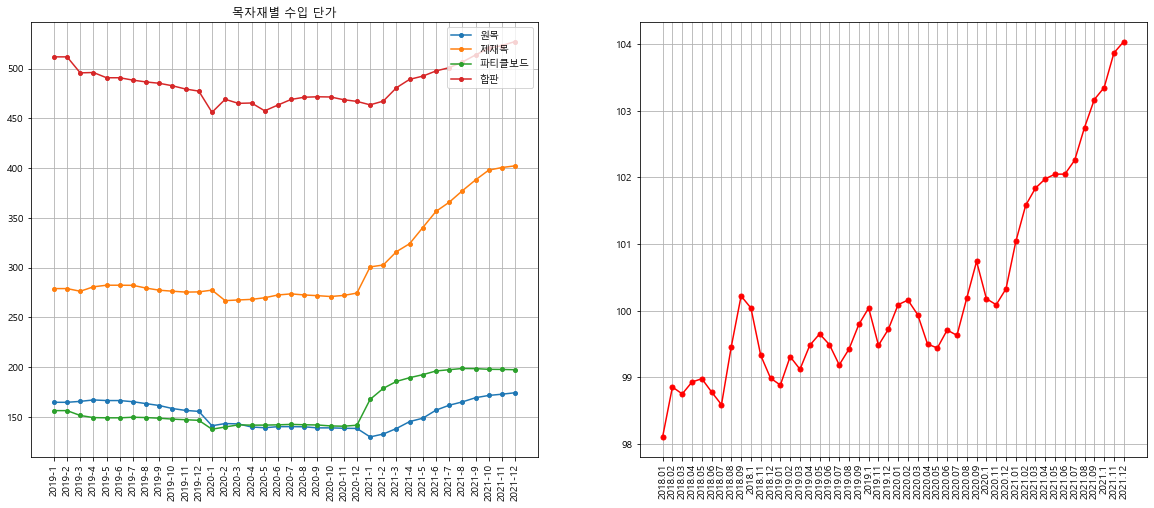

In [103]:
fig, axes=plt.subplots(1,2,figsize=(20,8))
plt.subplot(1,2,1)
plt.title('목자재별 수입 단가')
DF_lst=[wonmokDF,jjmDF,ptcDF,hpDF]

line1=plt.plot(wonmokDF.index,wonmokDF['단가'],marker='o',ms=4,label='원목')
line2=plt.plot(jjmDF.index,jjmDF['단가'],marker='o',ms=4,label='제재목')
line3=plt.plot(ptcDF.index,ptcDF['단가'],marker='o',ms=4,label='파티클보드')
line4=plt.plot(hpDF.index,hpDF['단가'],marker='o',ms=4,label='합판')

plt.xticks(rotation=90)
plt.grid(True)

lines=line1+line2+line3+line4
labels=[l.get_label() for l in lines]
plt.legend(lines, labels, loc='upper right')

plt.subplot(1,2,2)
plt.plot(cpiDF.columns, cpiDF.iloc[0], 'ro-', ms=5, label='물가 지수')
plt.grid(True)
plt.xticks(rotation=90)

plt.show()